In [4]:
from kaveh.behavioral.oculomotor.session import session
from kaveh.toolbox import find_file
from neo.io import Spike2IO
from matplotlib import pyplot as plt
import csv
import numpy as np
import os
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
import fnmatch

In [5]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
with open('../data/neurons_david_data_with_spike_train.csv', 'r') as csv_f:
    reader = csv.reader(csv_f)
    csv_content = np.array(list(reader))
file_names = np.array([fn[0] for fn in csv_content])

for i, fn in enumerate(file_names):
    print('{}: {}'.format(i, fn))

0: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O22/O22_2Adapt_BW5L_FW5LCFRDone.smr
1: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O22/O22_2PreAdaptCFRDone.smr
2: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_adapt40pct.smr
3: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_adapt30pct.smr
4: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_preadapt.smr
5: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O13/O13_3_adapt40pctB.smr
6: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O41/O41_1_FW5L_BW5R_A.smr
7: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O41/O41_1_pre.smr
8: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O29/O29_4Adapt_FW5L_BW5RCFR611sec.smr
9: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2006/Oscar/O29/O29_4PreAdaptCFRDone.smr
10: /mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2008_Random/Kimo/K14/error_direction/K14_1_directiona

In [52]:
with open('../data/david_neurs.csv', 'r') as csv_f:
    reader = csv.reader(csv_f)
    csv_content = np.array(list(reader))
neuron_names = np.array([fn[0].split('\t')[0].split('\t')[0] for fn in csv_content if fn[0][-1][-1] == '1'])

file_names = []
for nn in neuron_names:
    matches = []
    for root, dirnames, filenames in os.walk('../data/david_neurons/' + nn):
        for filename in fnmatch.filter(filenames, '*.smr.pkl'):
            matches.append(os.path.join(root, filename))
    if matches:
        for ff in matches:
            if os.path.exists(ff+'.GMM.CS.csv'):
                file_names.append(os.path.basename(ff)[0:-4])

# List of files with adapt/Adapt in their filenames 
adapt_filenames = [fb for fb in file_names if any(s in fb for s in ('adapt','Adapt') if 'PreAdapt' not in fb and 'Preadapt' not in fb)]
               

In [53]:
adapt_filenames

['O22_2Adapt_BW5L_FW5LCFRDone.smr',
 'O13_3_adapt40pct.smr',
 'O29_4Adapt_FW5L_BW5RCFR611sec.smr',
 'K32_1oblRBWLBWadapt.smr',
 'K25_1HadaptBOTHBW.smr',
 'K25_1HadaptBOTHFWmultstepsize.smr',
 'K34_1HadaptbothBW.smr',
 'W111308_1604_Adapt.smr',
 'W091008_1248_Adapt.smr',
 'W120308_2_1622_Adapt.smr',
 'W120108_1634_Adapt.smr',
 'W120508_1_1429_Adapt.smr',
 'W120508_2_1548_Adapt.smr',
 'W091208_1348_Adapt.smr',
 'W120208_1_1428_Adapt.smr',
 'F091106_1002_Adapt.smr',
 'F112006_1501_Adapt.smr',
 'F101106_1324_Adapt.smr',
 'F102006_0933_Adapt.smr',
 'F100906_1358_Adapt.smr',
 'F110706_1421_Adapt.smr',
 'F102706_1449_Adapt.smr',
 'F101606_1323_Adapt.smr',
 'F110206_1411_Adapt.smr',
 'B101308_1351_Adapt.smr',
 'B101308_1443_AdaptForward.smr',
 'B091608_1218_Adapt.smr',
 'B091608_1429_AdaptCTRL.smr',
 'B091608_1306_AdaptForward.smr',
 'B091908_21602_Adapt.smr',
 'B091208_AdaptForward.smr',
 'B091208_1554_Adapt.smr',
 'B100308_2_1504_AdaptForward.smr',
 'B100308_2_1412_Adapt.smr',
 'B093008_1242

In [54]:
f_index = 97
fn = 'B100308_2_1504_AdaptForward.smr'
f_name = find_file(fn, '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data')
f_name_session = find_file(fn+'.pkl.session.pkl', '../data/david_neurons')
# f_name_csv = find_file(os.path.basename(file_names[f_index])+'.pkl.GMM.CS.csv', '../data/david_neurons')
print(f_name)

print(f_name_session)
print(f_name_csv)

/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B100308_2/B100308_2_1504_AdaptForward.smr
../data/david_neurons/B100308_2/B100308_2_1504_AdaptForward.smr.pkl.session.pkl


NameError: name 'f_name_csv' is not defined

In [55]:
neo_reader = Spike2IO(filename=f_name)
neo_data = neo_reader.read()
data_block = neo_data[0]
seg = data_block.segments[0]

In [14]:
seg.analogsignals[2]

AnalogSignal with 1 channels of length 1158541; units deg; datatype float32 
name: 'Channel bundle (H E/T) '
annotations: {'channel_ids': array([3]),
  'channel_names': array([u'H E/T'], dtype='<U64')}
sampling rate: 1000.0
time: 0.000825 to 1158.541825

In [15]:
t_signal = seg.analogsignals[-1].times
signal_fs = seg.analogsignals[-1].sampling_rate


# Load eye data
HE = seg.analogsignals[0].as_array()
t_HE = seg.analogsignals[0].times;

VE = seg.analogsignals[1].as_array()
t_VE = seg.analogsignals[1].times

HT = seg.analogsignals[2].as_array()
t_HT = seg.analogsignals[2].times

VT = seg.analogsignals[3].as_array()
t_VT = seg.analogsignals[3].times

fs = seg.analogsignals[0].sampling_rate
dt = seg.analogsignals[0].sampling_period


# Load cs times from csGUI csv files

with open(f_name_csv, 'r') as csv_f:
    reader = csv.reader(csv_f)
    csv_content = np.array(list(reader), dtype=np.int64)

cs_indices = np.squeeze(csv_content[np.where(csv_content[:,1] == 1), 0])
cs_times = t_signal[cs_indices]

with open(f_name_session, 'rb') as input:
    try:
        mysess = pickle.load(input, encoding='latin1')
    except TypeError:
        mysess = pickle.load(input)

<IPython.core.display.Javascript object>


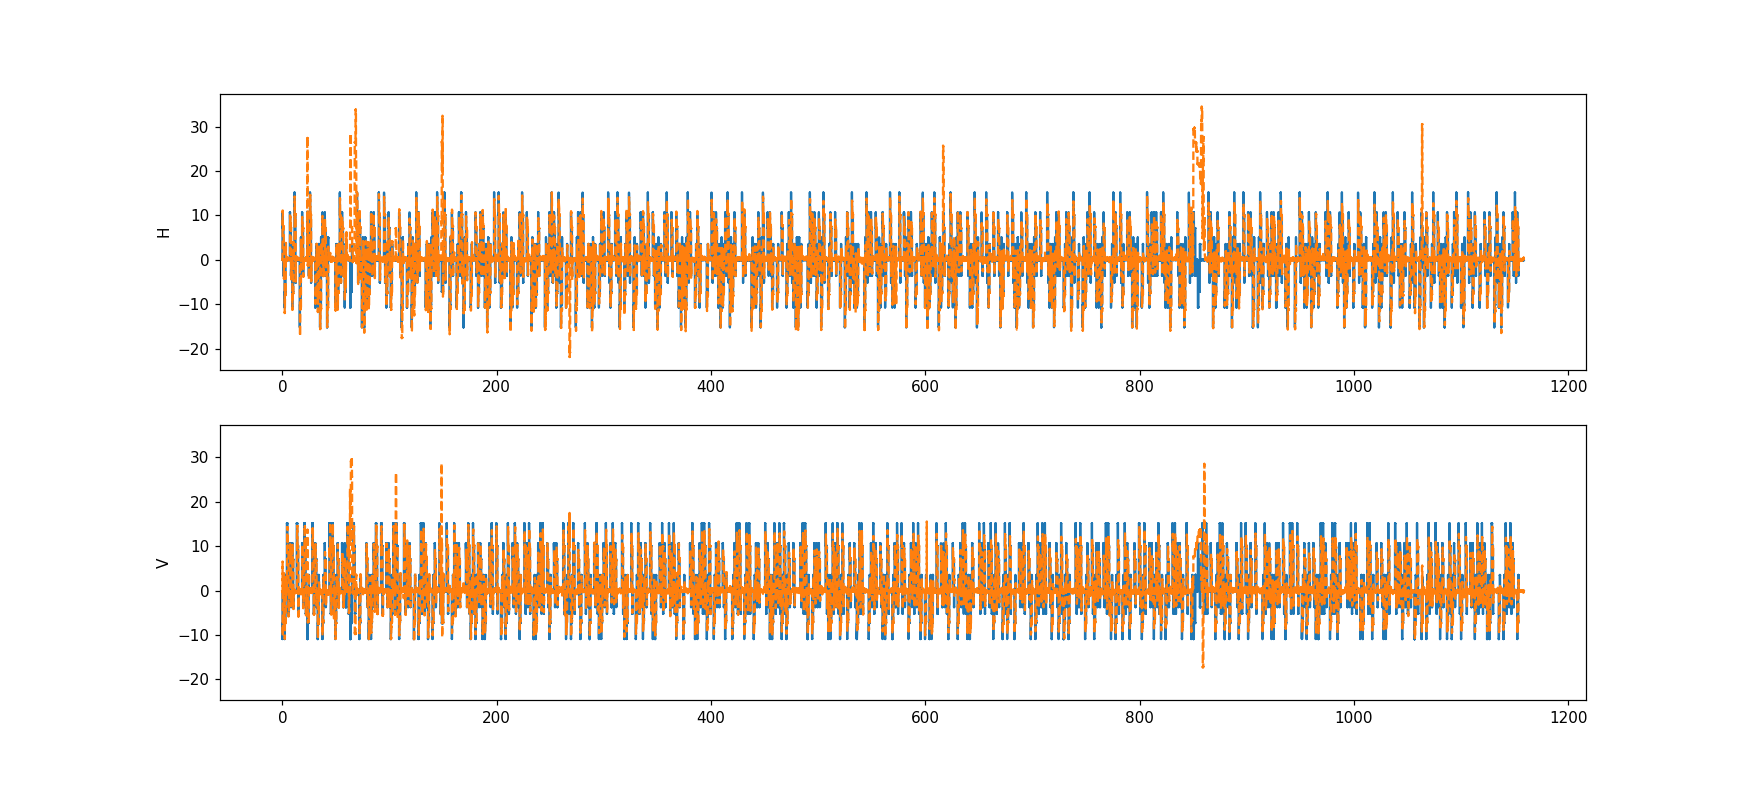

In [16]:
import gc
gc.collect()

plt.figure()

ax1 = plt.subplot(211)
plt.plot(t_HT, HT)
plt.plot(t_HE, HE, '--')
plt.ylabel('H')

ax2 = plt.subplot(212, sharex=ax1, sharey=ax1)
plt.plot(t_VT, VT)
plt.plot(t_VE, VE, '--')
plt.ylabel('V')
plt.show()